In [4]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

import glob
import pandas as pd

<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\biax-bubble-statistics
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\biax-bubble-statistics
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
import cdf
import scipy.stats
from scipy.optimize import curve_fit


2.91579850935 0.181130169909
2.93039431059 0.169419899474
2.94682006172 0.170409067812
2.94260942858 0.172546832603
C:\Users\Deen\Dropbox\PhD bubbles\firstframes\20160220\20160220T072131~gdot3.00000E-5~A296384000000.00000.csv
Small: 1007.1 pm 206.6 px2
Large: 2139.2 pm 345.1 px2
2.77510360851 0.215500996871
2.91678562853 0.16905195004
2.93840523597 0.162803663401
2.94926302691 0.161400836614
2.94418406063 0.169032520251
2.93074892032 0.161837165771
C:\Users\Deen\Dropbox\PhD bubbles\firstframes\20160220\20160221T095931~gdot3.00000E-5~A284984615384.61536.csv
Small: 1042.6 pm 276.9 px2
Large: 2122.1 pm 264.0 px2
2.76395483287 0.166889187821
2.94380576993 0.18007011248
2.9652268817 0.158099191953
2.96331717903 0.178537570114
2.96529841014 0.180564163671
2.95568481115 0.172292898978
C:\Users\Deen\Dropbox\PhD bubbles\firstframes\20160220\20160222T124011~gdot3.00000E-5~A274429629629.62961.csv
Small: 962.3 pm 212.3 px2
Large: 2080.4 pm 345.0 px2
2.73667570799 0.21822387612


C:\Python27\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


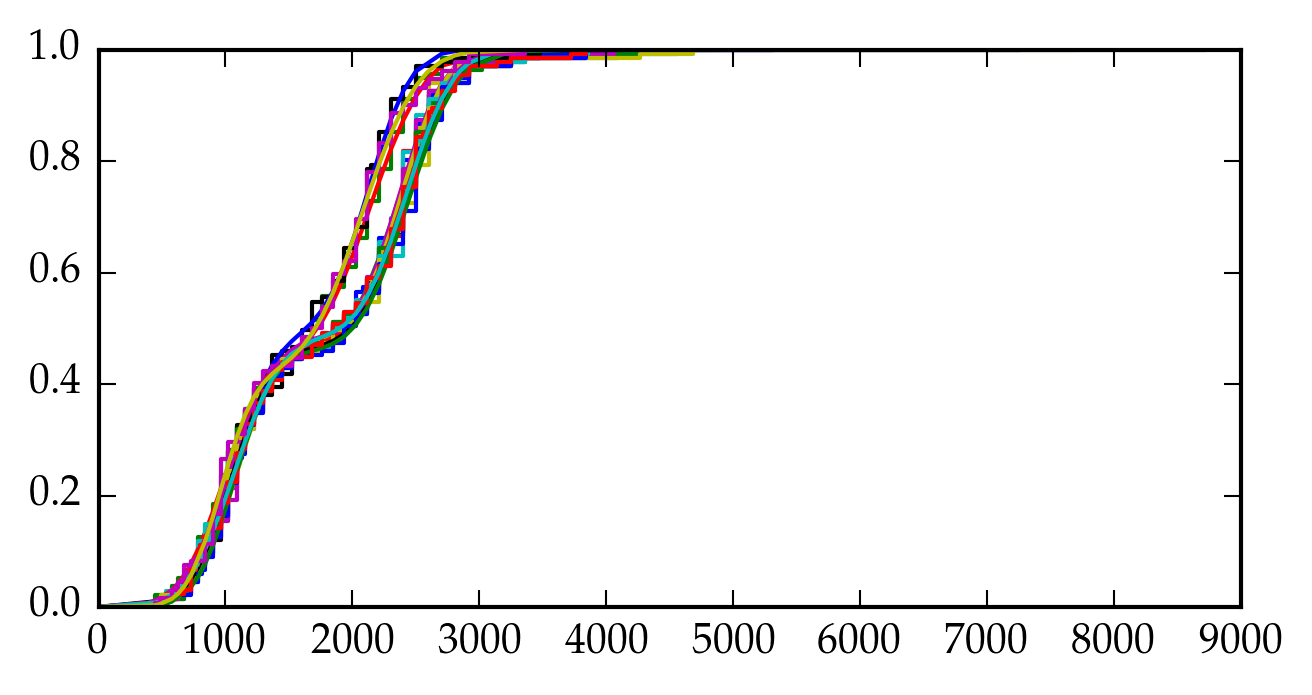

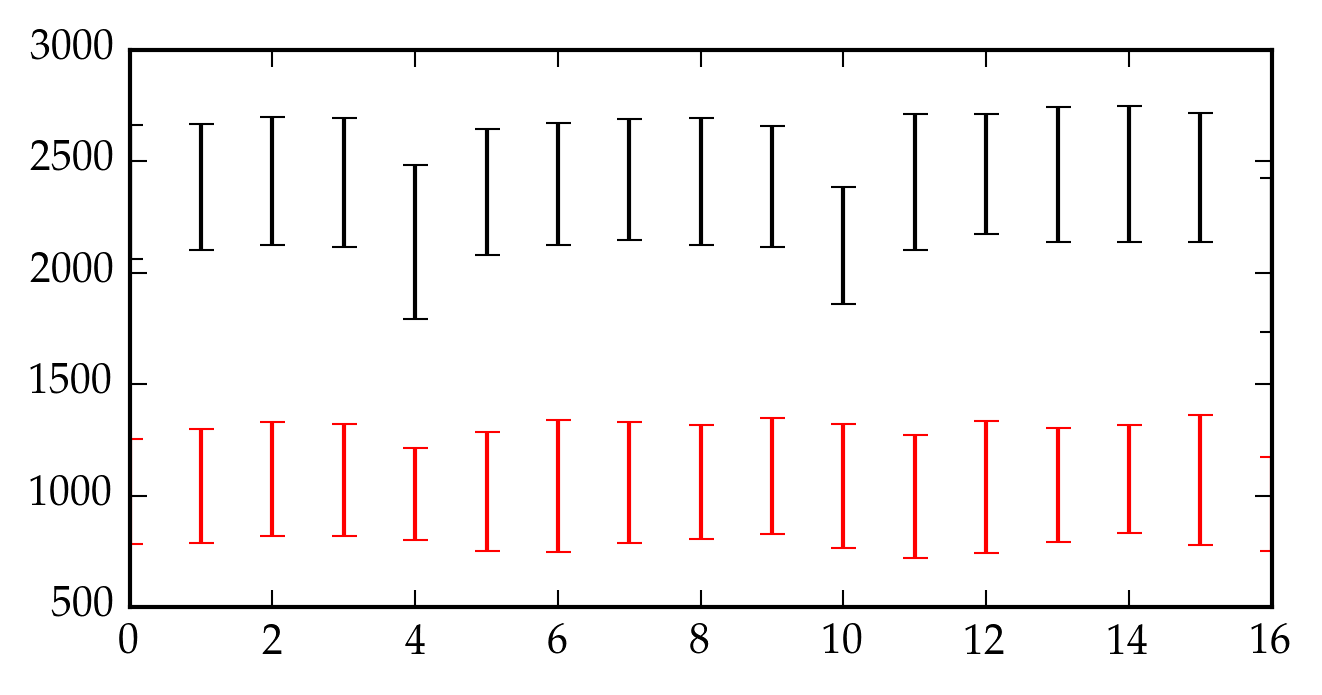

In [3]:
bins = np.linspace(0,40*0.06)

for i,measurement in enumerate(sorted(glob.glob(r"C:\Users\Deen\Dropbox\PhD bubbles\firstframes\20160220\*.csv"))):
    data = pd.read_csv(measurement)
    r = np.array(data["r"])
    r = r[isfinite(r)]
    #r = r * 0.06 # mm/px
    #plt.hist(r, bins=bins, histtype='step', label=str(i))
    
    x,y = cdf.get_cdf_data(4*r**2, lower=0)
    plt.figure(1)
    plt.plot(x,y)

    def doublegauss(x,frac,mu1,sigma1,mu2,sigma2):
        return frac*scipy.stats.norm(loc=mu1, scale=sigma1).cdf(x) + (1-frac)*scipy.stats.norm(loc=mu2, scale=sigma2).cdf(x)

    initial_guess = (0.5, 35**2, 100, 52**2, 100)

    p, _ = curve_fit(doublegauss, x, y, p0=initial_guess)

    
    plt.plot(x, doublegauss(x, *p))

    if p[3] < 2200:
        print measurement
        print "Small: %.1f pm %.1f px2" % (p[1], p[2])
        print "Large: %.1f pm %.1f px2" % (p[3], p[4])
    
    mn = sqrt(p[3]) * 0.06
    dev = sqrt(p[3] + p[4]) * 0.06 - mn
    print mn, dev
    
    plt.figure(2)
    plt.errorbar(i, p[1], yerr=p[2], color='red')
    plt.errorbar(i, p[3], yerr=p[4], color='black')

    
plt.legend()


In [13]:
px_per_mm = 0.0008251 / 4.95e-5 # px/tick, mm/tick
print px_per_mm

16.6686868687


In [9]:
import pandas as pd
begin = pd.read_csv(
    "../../../../PhD bubbles/data/20160226 bubble sizes/20160219T084258~A0.000000E+0~w0.000000E+0.txt",
    sep="\t")
begin["r"] = 0.5*np.sqrt(begin["Major"] * begin["Minor"])

eind = pd.read_csv(
    "../../../../PhD bubbles/data/20160226 bubble sizes/20160222T120724~A0.000000E+0~w0.000000E+0.txt",
    sep="\t")
eind["r"] = 0.5*np.sqrt(eind["Major"] * eind["Minor"])

In [10]:
np.sum(begin["r"] > 20), np.sum(eind["r"] > 20)

(75, 79)

\includegraphics{notebooks/biax-bubble-statistics/PDF-d.pdf}


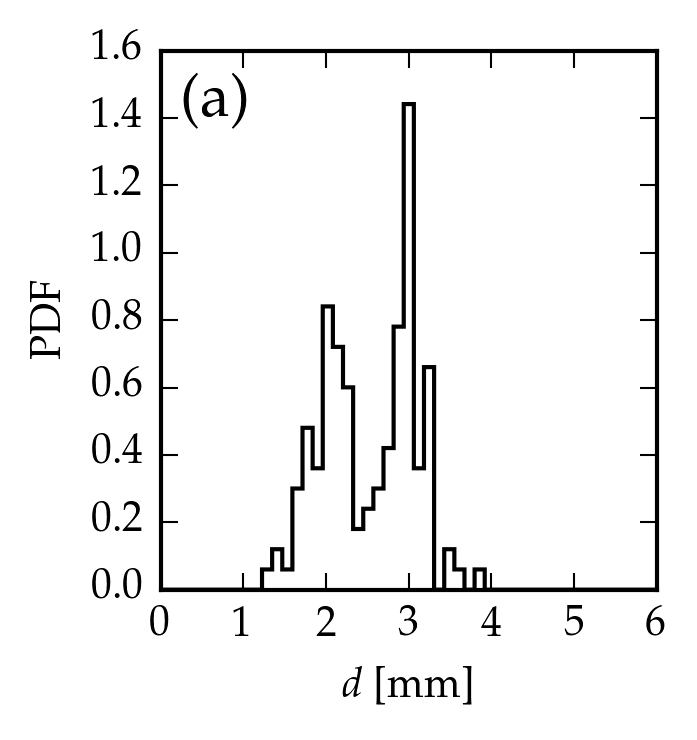

In [11]:


halffig()

plt.hist(begin["r"] * 2 / px_per_mm , bins=np.linspace(0,6,50), histtype='step', label='begin', normed=True, color='black')
#plt.hist(eind["r"] * 2 / px_per_mm , bins=np.linspace(0,6,50), histtype='step', label='begin', normed=True)
plt.ylabel(r"PDF")
plt.xlabel(r"$d$ [mm]")

subplotlabel('(a)')
savefig('PDF-d.pdf')

Small: 1149.0 pm 294.9 px
Large: 2482.1 pm 334.3 px
Small: 1123.0 pm 270.7 px
Large: 2494.2 pm 348.1 px


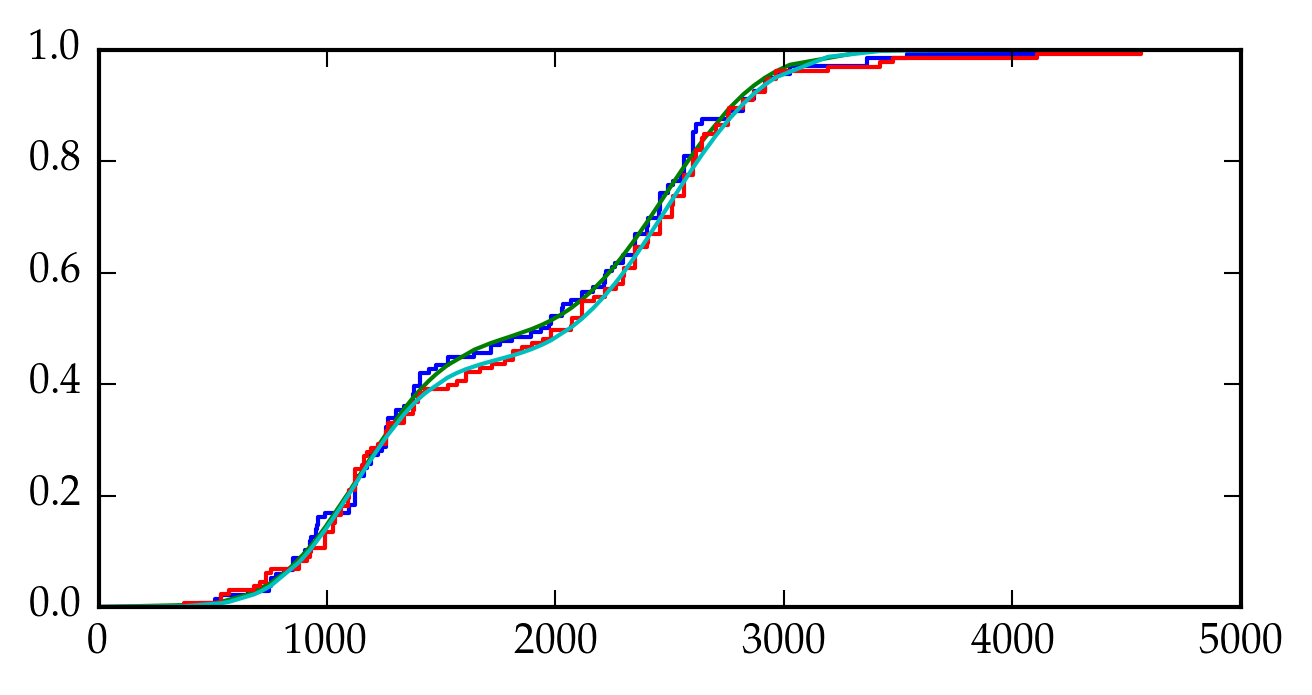

In [58]:
import cdf
import scipy.stats
from scipy.optimize import curve_fit

x,y = cdf.get_cdf_data(begin["r"]**2, lower=0)
plt.plot(x,y)

def doublegauss(x,frac,mu1,sigma1,mu2,sigma2):
    return frac*scipy.stats.norm(loc=mu1, scale=sigma1).cdf(x) + (1-frac)*scipy.stats.norm(loc=mu2, scale=sigma2).cdf(x)

initial_guess = (0.5, 35**2, 100, 52**2, 100)

p, _ = curve_fit(doublegauss, x, y, p0=initial_guess)

plt.plot(x, doublegauss(x, *p))

print "Small: %.1f pm %.1f px" % (p[1], p[2])
print "Large: %.1f pm %.1f px" % (p[3], p[4])

x,y = cdf.get_cdf_data(eind["r"]**2, lower=0)
plt.plot(x,y)

def doublegauss(x,frac,mu1,sigma1,mu2,sigma2):
    return frac*scipy.stats.norm(loc=mu1, scale=sigma1).cdf(x) + (1-frac)*scipy.stats.norm(loc=mu2, scale=sigma2).cdf(x)

initial_guess = (0.5, 35**2, 100, 52**2, 100)

p, _ = curve_fit(doublegauss, x, y, p0=initial_guess)

plt.plot(x, doublegauss(x, *p))

print "Small: %.1f pm %.1f px2" % (p[1], p[2])
print "Large: %.1f pm %.1f px2" % (p[3], p[4])


In [77]:
for i,measurement in enumerate(sorted(glob.glob(r"C:\Users\Deen\Dropbox\PhD bubbles\firstframes\20160220\*.csv"))):
    bime = [x for x in all_biax_measurements if os.path.split(measurement)[-1].split(".csv")[0] in x['path']][0]
    phi = bime['phi']
    data = pd.read_csv(measurement)

    r = np.array(data["r"])
    r = r[isfinite(r)]
    print bime["Aj"]

KeyError: 'Aj'

\includegraphics{notebooks/biax-bubble-statistics/A-vs-phi.pdf}


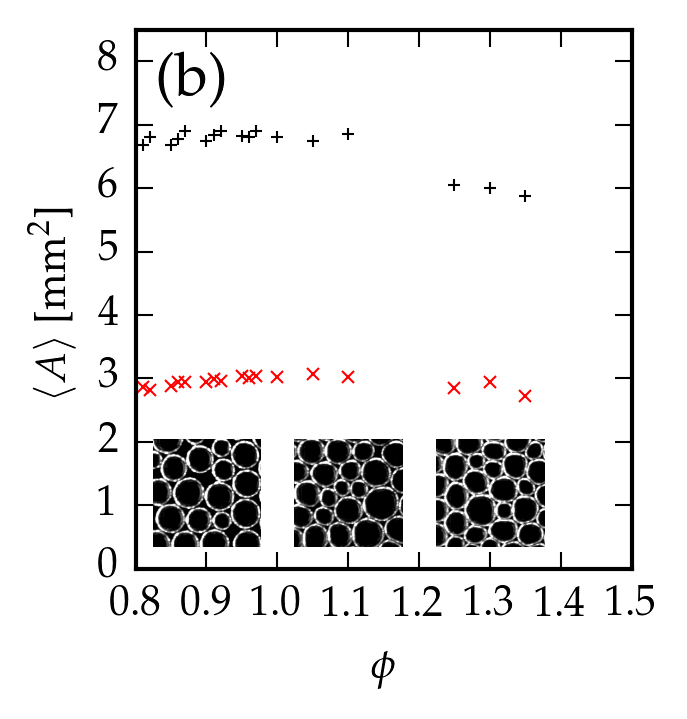

In [30]:
bins = np.linspace(0,40*0.06)

halffig()
ax = plt.gca()

size = 0.15
subaxes = {
    phi: plt.axes([0.25 + (0.69/0.7) * (phi - 0.8) - size/2,
                   0.22,
                   size, size],
                 frameon=False)
    for phi in [0.9, 1.1, 1.3]
}

#ax.axhline(3, color='red', lw=0.5)
#ax.axhline(7, color='black', lw=0.5)

for i,measurement in enumerate(sorted(glob.glob(r"C:\Users\Deen\Dropbox\PhD bubbles\firstframes\20160220\*.csv"))):
    bime = [x for x in all_biax_measurements if os.path.split(measurement)[-1].split(".csv")[0] in x['path']][0]
    phi = bime['phi']
    data = pd.read_csv(measurement)

    r = np.array(data["r"])
    r = r[isfinite(r)]

    
    def doublegauss(x,frac,mu1,sigma1,mu2,sigma2):
        return frac*scipy.stats.norm(loc=mu1, scale=sigma1).cdf(x) + (1-frac)*scipy.stats.norm(loc=mu2, scale=sigma2).cdf(x)

    areas = np.pi * (r / px_per_mm)**2 
    guess1 = 2.5 # 4 mm2
    guess2 = 6. # 9 mm2
    
    initial_guess = (0.5, guess1, 1, guess2, 1)
    x,y = cdf.get_cdf_data(areas, lower=0)
    p, _ = curve_fit(doublegauss, x, y, p0=initial_guess)
    
    #tresh = 0.5*(np.sqrt(p[1]) + np.sqrt(p[2]))
    
    #below = r < tresh
    #mn = sqrt(p[3])
    #dev = sqrt(p[3] + p[4]) - mn
    #print phi, p
    
    ax.plot(phi, p[1], color="red", marker="x", ms=3)
    ax.plot(phi, p[3], color="black", marker="+", ms=3)
    
    if np.round(phi,2) in subaxes: #, 1.3]:
        subax = subaxes[np.round(phi,2)]
        subax.imshow(plt.imread(bime['path'] + "/00000.png")[600:800,200:400], cmap='gray', vmin=0.1, vmax=0.5)
        subax.set_xticks([])
        subax.set_yticks([])
        

ax.axis(ymin=0, ymax=8.5, xmin=0.8, xmax=1.5)
ax.set_ylabel(r"$\langle A \rangle$ [mm$^2$]")
ax.set_xlabel(r"$\phi$")

#ax.grid(axis='y')

subplotlabel('(b)', ax=ax)
savefig('A-vs-phi.pdf')